In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()

spark = SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/31 16:51:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
print(type(set())

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pyspark.sql.functions import when, lit
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from pyspark.mllib.evaluation import RegressionMetrics

# Libsvm: Decision Tree 

In [3]:
data_libsvm = spark.read.format("libsvm").load("/Users/komlan/Project_M2/Algo_Big_Data/Data/sample_libsvm_data.txt")

labels = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data_libsvm)
features = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data_libsvm)

(train, test) = data_libsvm.randomSplit([0.8, 0.2])

dt = DecisionTreeClassifier(maxDepth=5, impurity='gini', labelCol="indexedLabel", featuresCol="indexedFeatures")

22/08/31 16:51:33 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


In [4]:
train.show(20)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[95,96,97,12...|
|  0.0|(692,[98,99,100,1...|
|  0.0|(692,[100,101,102...|
|  0.0|(692,[121,122,123...|
|  0.0|(692,[122,123,124...|
|  0.0|(692,[122,123,148...|
|  0.0|(692,[123,124,125...|
|  0.0|(692,[123,124,125...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[125,126,127...|
|  0.0|(692,[126,127,128...|
|  0.0|(692,[126,127,128...|
|  0.0|(692,[126,127,128...|
|  0.0|(692,[126,127,128...|
|  0.0|(692,[126,127,128...|
|  0.0|(692,[126,127,128...|
+-----+--------------------+
only showing top 20 rows



In [5]:
pipeline = Pipeline(stages=[labels, features, dt])
model = pipeline.fit(train)

predictions = model.transform(test)
predictions.select("prediction", "indexedLabel", "features").show(10)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ",accuracy)


+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[127,128,129...|
|       1.0|         1.0|(692,[127,128,129...|
|       1.0|         1.0|(692,[155,156,180...|
|       0.0|         0.0|(692,[97,98,99,12...|
|       0.0|         0.0|(692,[119,120,121...|
|       0.0|         0.0|(692,[124,125,126...|
+----------+------------+--------------------+
only showing top 10 rows

Accuracy:  1.0


# Breast-Cancer: Decision Tree

In [6]:
#https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/breast-cancer
data_breast = spark.read.format("libsvm").load("/Users/komlan/Project_M2/Algo_Big_Data/Data/breast-cancer")

labels = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data_breast)
features = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data_breast)

(train, test) = data_breast.randomSplit([0.8, 0.2])

dt = DecisionTreeClassifier(maxDepth=7, impurity='gini', labelCol="indexedLabel", featuresCol="indexedFeatures")

22/02/27 22:39:43 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


In [7]:
pipeline = Pipeline(stages=[labels, features, dt])
model = pipeline.fit(train)

predictions = model.transform(test)
predictions.select("prediction", "indexedLabel", "features").show(10)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ",accuracy)


+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       1.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
|       1.0|         0.0|(10,[0,1,2,3,4,5,...|
|       0.0|         0.0|(10,[0,1,2,3,4,5,...|
+----------+------------+--------------------+
only showing top 10 rows

Accuracy:  0.9318181818181818


#  Libsvm: Random forest

In [8]:
labelsInd = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data_libsvm)
featuresInd = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data_libsvm)

(train, test) = data_libsvm.randomSplit([0.8, 0.2])
rf = RandomForestClassifier(impurity='gini', numTrees=3, labelCol="indexedLabel", featuresCol="indexedFeatures")

labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelsInd.labels)

pipeline = Pipeline(stages=[labelsInd, featuresInd, rf, labelConverter])
model = pipeline.fit(train)
predictions = model.transform(test)

predictions.select("prediction", "indexedLabel", "features").show(10)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ",accuracy)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[100,101,102...|
|       1.0|         1.0|(692,[122,123,124...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[125,126,127...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[150,151,152...|
|       1.0|         1.0|(692,[152,153,154...|
+----------+------------+--------------------+
only showing top 10 rows

Accuracy:  1.0


# Covtype: Random Forest

In [9]:
data_covtype = spark.read.format("libsvm").load("/Users/komlan/Project_M2/Algo_Big_Data/Data/covtype.libsvm.binary")

labelsInd = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data_covtype)
featuresInd = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data_covtype)

(train, test) = data_covtype.randomSplit([0.8, 0.2])
rf = RandomForestClassifier(impurity='gini', numTrees=5, labelCol="indexedLabel", featuresCol="indexedFeatures")

labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelsInd.labels)

pipeline = Pipeline(stages=[labelsInd, featuresInd, rf, labelConverter])
model = pipeline.fit(train)
predictions = model.transform(test)

predictions.select("prediction", "indexedLabel", "features").show(10)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ",accuracy)

22/02/27 22:39:52 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.
ERROR:root:KeyboardInterrupt while sending command.                 (0 + 4) / 4]
Traceback (most recent call last):
  File "/Users/komlan/pythonEnv/lib/python3.9/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/Users/komlan/pythonEnv/lib/python3.9/site-packages/py4j/clientserver.py", line 475, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/Users/komlan/opt/anaconda3/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

# RED Wine: Random Forest

In [ ]:
win_data = spark.read.csv("/Users/komlan/Project_M2/Algo_Big_Data/Data/winequality-red.csv", header=True, sep=";")

win_data = win_data.withColumn("label", when((win_data.quality < 5), lit(0)).otherwise(lit(1)))
features_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for column in features_columns:
    win_data = win_data.withColumn(column, win_data[column].cast(DoubleType()))
    
va = VectorAssembler(inputCols = features_columns, outputCol='features')

va_df = va.transform(win_data)
va_df = va_df.select(['features', 'label'])
va_df.show(10)

In [12]:
labelsInd = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(va_df)
featuresInd = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(va_df)

(train, test) = va_df.randomSplit([0.8, 0.2])
rf = RandomForestClassifier(impurity='gini', numTrees=5, labelCol="indexedLabel", featuresCol="indexedFeatures")

labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelsInd.labels)

pipeline = Pipeline(stages=[labelsInd, featuresInd, rf, labelConverter])
model = pipeline.fit(train)
predictions = model.transform(test)

predictions.select("prediction", "indexedLabel", "features").show(10)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ",accuracy)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[4.9,0.42,0.0,2.1...|
|       1.0|         0.0|[5.0,1.04,0.24,1....|
|       0.0|         0.0|[5.2,0.48,0.04,1....|
|       0.0|         0.0|[5.3,0.47,0.11,2....|
|       0.0|         0.0|[5.4,0.74,0.0,1.2...|
|       0.0|         0.0|[5.4,0.835,0.08,1...|
|       0.0|         0.0|[5.6,0.5,0.09,2.3...|
|       0.0|         0.0|[5.6,0.54,0.04,1....|
|       0.0|         1.0|[5.6,0.62,0.03,1....|
|       0.0|         0.0|[5.6,0.915,0.0,2....|
+----------+------------+--------------------+
only showing top 10 rows

Accuracy:  0.9446254071661238


[Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=1.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0), Row(prediction=0.0)]


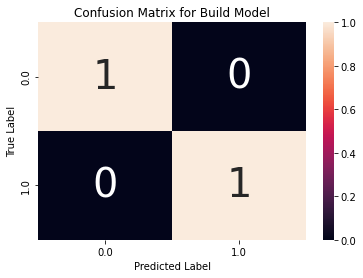

In [10]:
def plot_confusion_matrix(cm, classes=None, title=None):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, annot_kws={'size':40})
    else:
        sns.heatmap(cm, vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
y_pred = predictions.select("prediction").collect()
print(y_pred)
y_orig = predictions.select("indexedLabel").collect()

cm = confusion_matrix(y_orig, y_pred)

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
classes = np.unique(y_orig)
plot_confusion_matrix(cm_norm, classes, title="Confusion Matrix for Build Model")

# Lpsa Data: Regression Linéaire

In [17]:
data_lpsa = sc.textFile("/Users/komlan/Project_M2/Algo_Big_Data/Data/lpsa.data")
# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.replace(',', ' ').split(' ')]
    return LabeledPoint(values[0], values[1:])

parsedData = data_lpsa.map(parsePoint)
parsedData.collect()[:5]

[LabeledPoint(-0.4307829, [-1.63735562648104,-2.00621178480549,-1.86242597251066,-1.02470580167082,-0.522940888712441,-0.863171185425945,-1.04215728919298,-0.864466507337306]),
 LabeledPoint(-0.1625189, [-1.98898046126935,-0.722008756122123,-0.787896192088153,-1.02470580167082,-0.522940888712441,-0.863171185425945,-1.04215728919298,-0.864466507337306]),
 LabeledPoint(-0.1625189, [-1.57881887548545,-2.1887840293994,1.36116336875686,-1.02470580167082,-0.522940888712441,-0.863171185425945,0.342627053981254,-0.155348103855541]),
 LabeledPoint(-0.1625189, [-2.16691708463163,-0.807993896938655,-0.787896192088153,-1.02470580167082,-0.522940888712441,-0.863171185425945,-1.04215728919298,-0.864466507337306]),
 LabeledPoint(0.3715636, [-0.507874475300631,-0.458834049396776,-0.250631301876899,-1.02470580167082,-0.522940888712441,-0.863171185425945,-1.04215728919298,-0.864466507337306])]

In [19]:
model = LinearRegressionWithSGD.train(parsedData, iterations=100, step=0.00000001)
valuesAndPreds = parsedData.map(lambda p: (float(model.predict(p.features)), p.label))

#Metrics
metrics = RegressionMetrics(valuesAndPreds)
# Errors
print("MSE = %s" % metrics.meanSquaredError)
print("RMSE = %s" % metrics.rootMeanSquaredError)
print("R-squared = %s" % metrics.r2)
print("MAE = %s" % metrics.meanAbsoluteError)
print("Explained variance = %s" % metrics.explainedVariance)

MSE = 7.451032810102602
RMSE = 2.729658002406639
R-squared = -4.184999022218233
MAE = 2.4797581969820053
Explained variance = 6.013996410502294


# Fertility Data: Regression Linéaire

In [45]:
from pyspark.ml.classification import LogisticRegression
#https://archive.ics.uci.edu/ml/datasets/Fertility#
data_fertility = spark.read.csv("/Users/komlan/Project_M2/Algo_Big_Data/Data/fertility_Diagnosis.txt")
num_columns = data_fertility.columns[:-1]
for column in num_columns:
    data_fertility = data_fertility.withColumn(column, data_fertility[column].cast(DoubleType()))
data_fertility = data_fertility.withColumn("label",when((data_fertility._c9 == "N"), lit(0)).otherwise(lit(1)))

rows_fertility = VectorAssembler(inputCols = num_columns, outputCol = 'features')
rows_fertility = assembler_raw.transform(data_fertility).select(['features','label'])
rows_fertility.show(10)
labels = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(rows_fertility)
features = VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(rows_fertility)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-0.33,0.69,0.0,1...|    0|
|[-0.33,0.94,1.0,0...|    1|
|[-0.33,0.5,1.0,0....|    0|
|[-0.33,0.75,0.0,1...|    0|
|[-0.33,0.67,1.0,1...|    1|
|[-0.33,0.67,1.0,0...|    0|
|[-0.33,0.67,0.0,0...|    0|
|[-0.33,1.0,1.0,1....|    0|
|[1.0,0.64,0.0,0.0...|    0|
|[1.0,0.61,1.0,0.0...|    0|
+--------------------+-----+
only showing top 10 rows



In [46]:
(train, test) = rows_fertility.randomSplit([0.8, 0.2])
lr = LogisticRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(train)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary
trainingSummary

22/02/20 01:01:16 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/02/20 01:01:17 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


Coefficients: 
1 X 9 CSRMatrix

Intercept: [-1.9328380674879604]
